<a id ='title'></a>

# Задачи исследования


# [Шаг 1. Откройте файл с данными и изучите общую информацию](#stage_1)

- Путь к файлу: logs_exp.csv

---


# [Шаг 2. Подготовьте данные](#stage_2)

1. [Замените названия столбцов на удобные](#stage_2_1)

---

2. [Проверьте пропуски и типы данных. Откорректируйте, если нужно](#stage_2_2)

---

3. [Добавьте столбец даты и времени, а также отдельный столбец дат](#stage_2_3)

---


# [Шаг 3. Изучите и проверьте данные](#stage_3)

1. [Сколько всего событий в логе?](#stage_3_1)

---

2. [Сколько всего пользователей в логе?](#stage_3_2)

---

3. [Сколько в среднем событий приходится на пользователя?](#stage_3_3)

---

4. [Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?](#stage_3_4)

---

5. [Много ли событий и пользователей вы потеряли, отбросив старые данные?](#stage_3_5)

---

6. [Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп](#stage_3_6)

---


# [Шаг 4. Изучите воронку событий](#stage_4)

1. [Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте](#stage_4_1)

---

2. [Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие](#stage_4_2)

---

3. [Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки](#stage_4_3)

---

4. [По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C, посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A](#stage_4_4)

---

5. [На каком шаге теряете больше всего пользователей?](#stage_4_5)

---

6. [Какая доля пользователей доходит от первого события до оплаты?](#stage_4_6)

---


# [Шаг 5. Изучите результаты эксперимента](#stage_5)

1. [Сколько пользователей в каждой экспериментальной группе?](#stage_5_1)

---

2. [Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.](#stage_5_2)

---

3. [Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?](#stage_5_3)

---

4. [Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?](#stage_5_4)

---

5. [Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы](#stage_5_5)

---

# Описание данных

logs_exp.csv:

Каждая запись в логе — это действие пользователя, или событие:
- EventName — название события
- DeviceIDHash ** — уникальный идентификатор пользователя
- EventTimestamp — время события
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная

---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

---

<a id ="stage_1"></a>

# Шаг 1. Откройте файл с данными и изучите общую информацию

[К оглавлению](#title)

In [9]:
data = pd.read_csv('logs_exp.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Нет пустых значений, всю предобработку сделаем ниже

---

<a id ="stage_2"></a>

# Шаг 2. Подготовьте данные

[К оглавлению](#title)

---

<a id ="stage_2_1"></a>

### 2.1. Замените названия столбцов на удобные

[К оглавлению](#title)

In [10]:
data.columns  = ['event_name', 'id_user', 'time_unix', 'id_exp']
data.head()

,event_name,id_user,time_unix,id_exp
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


---

<a id ="stage_2_2"></a>

### 2.2. Проверьте пропуски и типы данных. Откорректируйте, если нужно

[К оглавлению](#title)

In [11]:
data.duplicated().sum()

413

In [12]:
data = data.drop_duplicates().reset_index(drop = True)
data.duplicated().sum()

0

---

<a id ="stage_2_3"></a>

### 2.3. Добавьте столбец даты и времени, а также отдельный столбец дат

[К оглавлению](#title)

In [13]:
data['time'] = pd.to_datetime(data['time_unix'], unit='s')
data['date'] = pd.to_datetime(data['time'].dt.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   id_user     243713 non-null  int64         
 2   time_unix   243713 non-null  int64         
 3   id_exp      243713 non-null  int64         
 4   time        243713 non-null  datetime64[ns]
 5   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


In [14]:
data.head()

,event_name,id_user,time_unix,id_exp,time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


---

<a id ="stage_3"></a>

# Шаг 3. Изучите и проверьте данные

[К оглавлению](#title)

---

<a id ="stage_3_1"></a>

### 3.1. Сколько всего событий в логе?

[К оглавлению](#title)

In [15]:
how_much_unique = len(data['event_name'].unique())
how_much = len(data['event_name'])

print(f'В логе {how_much_unique} уникальных событий')
print(f'В логе всего {how_much} событий')

В логе 5 уникальных событий
В логе всего 243713 событий


---

<a id ="stage_3_2"></a>

### 3.2. Сколько всего пользователей в логе?

[К оглавлению](#title)

In [16]:
users_count = data['id_user'].nunique()
print(f'Всего пользователей в логе: {users_count}')

Всего пользователей в логе: 7551


---

<a id ="stage_3_3"></a>

### 3.3. Сколько в среднем событий приходится на пользователя?

[К оглавлению](#title)

In [17]:
data.groupby('id_user').agg({'event_name': 'count'}).mean().round()

event_name    32.0
dtype: float64

В среднем на пользователя - 32 события

---

<a id ="stage_3_4"></a>

### 3.4. Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

[К оглавлению](#title)

#### 3.4.1. Данными за какой период вы располагаете?

In [18]:
start = data['time'].min()
finish = data['time'].max()
print(f'Мы располагаем данными с {start} - {finish}')

delta = finish - start
print(f'Это временной отрезок длиной: {delta}')

Мы располагаем данными с 2019-07-25 04:43:36 - 2019-08-07 21:15:17
Это временной отрезок длиной: 13 days 16:31:41


#### 3.4.2. Постройте гистограмму по дате и времени.

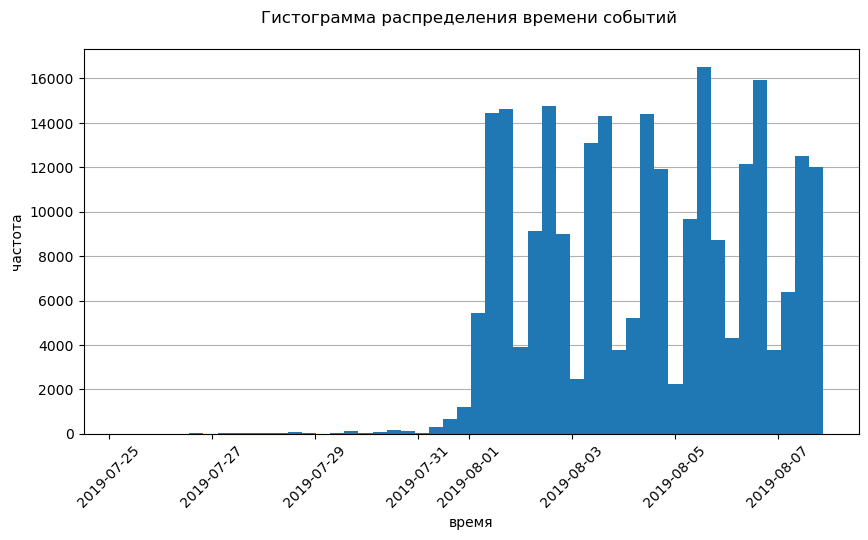

In [19]:
plt.figure(figsize=(10, 5))
ax = \
data['time'].hist(bins = 50)
plt.grid(axis = 'x')
plt.xticks(rotation = 45)
plt.xlabel('время')
plt.ylabel('частота')
plt.title('Гистограмма распределения времени событий \n')
ax.set_axisbelow(True)

Данные сгруппированы, в основном,  в августе

#### 3.4.3. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

In [20]:
data['date'].value_counts()

date
2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
2019-07-31     2030
2019-07-30      412
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: count, dtype: int64

In [21]:
date_count = \
data.groupby('date').agg({'date':'count'}) \
                    .rename({'date':'date_count'}, axis = 1) \
                    .reset_index()

# Для полноты картины векторно просумируем
sum_count_events = date_count['date_count'].sum()
date_count['percent_count_cumsum'] = date_count['date_count'].map(lambda x: (x/sum_count_events)*100).cumsum().round(2)
date_count

,date,date_count,percent_count_cumsum
0,2019-07-25,9,0.00
1,2019-07-26,31,0.02
2,2019-07-27,55,0.04
3,2019-07-28,105,0.08
4,2019-07-29,184,0.16
5,2019-07-30,412,0.33
6,2019-07-31,2030,1.16
7,2019-08-01,36141,15.99
8,2019-08-02,35554,30.58
9,2019-08-03,33282,44.23


Видим, данные, влияющие на выборку начинаются с 2019-08-01 --> отсортируем их

In [22]:
data_clear = data[data['date'] >= '2019-08-01']
data_clear.shape[0], data.shape[0]

(240887, 243713)

Видим, что данные сократились всего на 3000 --> приемлимо при такой большой выборке

---

<a id ="stage_3_5"></a>

### 3.5. Много ли событий и пользователей вы потеряли, отбросив старые данные?

[К оглавлению](#title)

In [23]:
# события
delta_events = data.shape[0] - data_clear.shape[0]
print(f'{delta_events} событий потеряно из общей массы')

count_type_events_dirty = len(data['event_name'].unique())
count_type_events_clear = len(data_clear['event_name'].unique())

print(f'{count_type_events_dirty} типов событий было')
print(f'{count_type_events_clear} типов событий стало')

2826 событий потеряно из общей массы
5 типов событий было
5 типов событий стало


In [24]:
# пользователи
count_user_dirty = len(data['id_user'].unique())
count_user_clear = len(data_clear['id_user'].unique())

print(f'{count_user_dirty} пользователей было')
print(f'{count_user_clear} пользователей стало')

percent_lost = (((count_user_dirty - count_user_clear) / count_user_dirty )*100).__round__(2)

print(f'{percent_lost}% потерянных пользователей после чистки данных')

7551 пользователей было
7534 пользователей стало
0.23% потерянных пользователей после чистки данных


---

<a id ="stage_3_6"></a>

### 3.6. Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп

[К оглавлению](#title)

In [25]:
data_clear.groupby('id_exp').agg({'id_user': 'nunique'})

,id_user
id_exp,
246,2484
247,2513
248,2537


Пользователи есть во всех группах

---

<a id ="stage_4"></a>

# Шаг 4. Изучите воронку событий

[К оглавлению](#title)

---

<a id ="stage_4_1"></a>

### 4.1. Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте

[К оглавлению](#title)

Text(0.5, 1.0, 'Количество событий (распределенные по типу) \n')

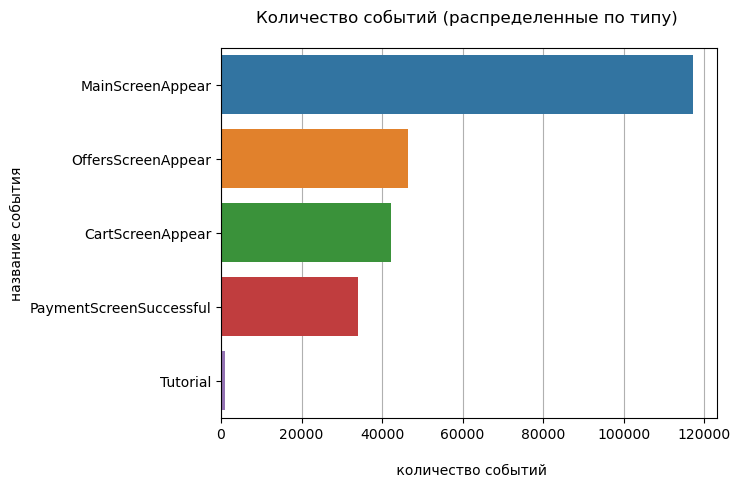

In [26]:
data_events = \
data_clear['event_name'].value_counts().reset_index()

data_events.columns = ['event_name', 'event_count']

ax = \
sns.barplot(data = data_events,
            x = 'event_count',
            y = 'event_name')
plt.grid(axis = 'x')
ax.set_axisbelow(True)
plt.xlabel('\n количество событий')
plt.ylabel('название события')
plt.title('Количество событий (распределенные по типу) \n')

---

<a id ="stage_4_2"></a>

### 4.2. Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие

[К оглавлению](#title)

In [27]:
user_event_count =\
data_clear.groupby('event_name').agg({'id_user': 'nunique'}) \
                                .reset_index() \
                                .rename({'id_user': 'unique_user_count'}, axis = 1) \
                                .sort_values(by = 'unique_user_count', ascending=False)

user_event_count

,event_name,unique_user_count
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [28]:
user_event_count['percent'] = user_event_count['unique_user_count'].map(lambda x: (x/user_event_count['unique_user_count'].sum()) * 100).round(2)
user_event_count

,event_name,unique_user_count,percent
1,MainScreenAppear,7419,36.86
2,OffersScreenAppear,4593,22.82
0,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59
4,Tutorial,840,4.17


---

<a id ="stage_4_3"></a>

### 4.3. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?

[К оглавлению](#title)

Последовательность: 

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful


Tutorial - может быть на любом этапе

Логично, что отсортированное кол-во событий (по убыванию) - дает ту же последовательность

---

<a id ="stage_4_4"></a>

### 4.4. По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C, посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A

[К оглавлению](#title)

In [29]:
# уберем туториал из воронки событий
user_event_count_4_4 = user_event_count.iloc[:4, :2]
user_event_count_4_4

,event_name,unique_user_count
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


In [30]:
key_start = user_event_count_4_4['unique_user_count'].to_list()[0]
percent_spisok = []
for key in user_event_count_4_4['unique_user_count'].to_list():
    key_percent = (key/key_start)*100
    percent_spisok.append(key_percent)
    key_start = key

percent_spisok

[100.0, 61.908613020622724, 81.29762682342695, 94.7777182645956]

In [31]:
user_event_count_4_4['доля_переходящих_пользователей_по_воронке_событий'] = percent_spisok
user_event_count_4_4.round(2)

,event_name,unique_user_count,доля_переходящих_пользователей_по_воронке_событий
1,MainScreenAppear,7419,100.00
2,OffersScreenAppear,4593,61.91
0,CartScreenAppear,3734,81.30
3,PaymentScreenSuccessful,3539,94.78


In [32]:
from plotly import graph_objects as go

fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = user_event_count_4_4['event_name'],
    x = user_event_count_4_4['unique_user_count']))
fig.show()

---

<a id ="stage_4_5"></a>

### 4.5. На каком шаге теряете больше всего пользователей?

[К оглавлению](#title)

In [33]:
user_event_count_4_5 = user_event_count_4_4[['event_name', 'unique_user_count']]

key_start = user_event_count_4_5['unique_user_count'].to_list()[0]

delta_spisok = []
for key in user_event_count_4_5['unique_user_count'].to_list():
    key_to_spisok = key_start - key
    delta_spisok.append(key_to_spisok)
    key_start = key

user_event_count_4_5['потеря_пользователей (кол-во)'] = delta_spisok
user_event_count_4_5

,event_name,unique_user_count,потеря_пользователей (кол-во)
1,MainScreenAppear,7419,0
2,OffersScreenAppear,4593,2826
0,CartScreenAppear,3734,859
3,PaymentScreenSuccessful,3539,195


Большая потеря происходит при переходе MainScreenAppear --> OffersScreenAppear

---

<a id ="stage_4_6"></a>

### 4.6. Какая доля пользователей доходит от первого события до оплаты?

[К оглавлению](#title)

In [34]:
user_event_count_4_6 = user_event_count_4_5[['event_name', 'unique_user_count']]

dolya = \
((user_event_count_4_6['unique_user_count'].to_list()[-1] / user_event_count_4_6['unique_user_count'].to_list()[0])*100).__round__(1)
dolya

47.7

47.7% пользователей доходит ло оплаты

---

<a id ="stage_5"></a>

# Шаг 5. Изучите результаты эксперимента

[К оглавлению](#title)

---

<a id ="stage_5_1"></a>

### 5.1. Сколько пользователей в каждой экспериментальной группе?

[К оглавлению](#title)

In [35]:
data_clear.groupby('id_exp').agg({'id_user': 'nunique'})

,id_user
id_exp,
246,2484
247,2513
248,2537


---

<a id ="stage_5_2"></a>

### 5.2. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

[К оглавлению](#title)

#### Для успешного A/A теста:

- разница в кол-ве образцов (пользователей) не более 0.5 - 1 %
- сравниваются одинаковые показатели
- разница в метриках не более чем 1 % + нет статистической значимости (этот пункт не относится к вопросу 5.2)
- пользователь остается в одной и той же группе исследования в течении всего теста

In [36]:
exp_246 = data_clear[(data_clear['id_exp'] == 246) & (data_clear['event_name'] != 'Tutorial')]
exp_247 = data_clear[(data_clear['id_exp'] == 247) & (data_clear['event_name'] != 'Tutorial')]
exp_248 = data_clear[(data_clear['id_exp'] == 248) & (data_clear['event_name'] != 'Tutorial')]

#### 1. ПРОВЕРКА УСЛОВИЯ: разница в кол-ве образцов (пользователей) не более 0.5 - 1 % 

In [37]:
data_clear_67 = data_clear[(data_clear['id_exp'] == 246) | (data_clear['id_exp'] == 247)]

data_clear_67_count_users = \
data_clear_67.groupby('id_exp').agg({'id_user': 'nunique'}).reset_index()

data_clear_67_count_users.columns = ['id_exp', 'count_unique_users']

summ = data_clear_67_count_users['count_unique_users'].sum()

data_clear_67_count_users['percent'] = data_clear_67_count_users['count_unique_users'].map(lambda x: (x/summ)*100).round(2)

delta = abs(data_clear_67_count_users['percent'][0] - data_clear_67_count_users['percent'][1]).__round__(2)

print(f'Разность долей выборок в 246 и 247 группах: {delta}% ')
data_clear_67_count_users

Разность долей выборок в 246 и 247 группах: 0.58% 


,id_exp,count_unique_users,percent
0,246,2484,49.71
1,247,2513,50.29


Но это по всем событиям, посморим - равно ли распределены данные по отдельным событиям

In [38]:
concat_future_246 = exp_246.groupby('event_name').agg({'id_user': 'nunique'}).rename({'id_user': 'count_unique_users_246'}, axis=1)
concat_future_247 = exp_247.groupby('event_name').agg({'id_user': 'nunique'}).rename({'id_user': 'count_unique_users_247'}, axis=1)

event_group_246_247_data = \
pd.concat([concat_future_246, concat_future_247],
          axis=1)

def percent_row(row):
    summ = row['count_unique_users_246'] + row['count_unique_users_247']
    return (row['count_unique_users_246'] / summ)*100

def percent_row_1(row):
    summ = row['count_unique_users_246'] + row['count_unique_users_247']
    return (row['count_unique_users_247'] / summ)*100

event_group_246_247_data['доля_246'] = event_group_246_247_data.apply(lambda row: percent_row(row), axis=1)
event_group_246_247_data['доля_247'] = event_group_246_247_data.apply(lambda row: percent_row_1(row), axis=1)
event_group_246_247_data['delta_percent'] = abs(event_group_246_247_data['доля_246'] - event_group_246_247_data['доля_247'])
event_group_246_247_data.round(2)

,count_unique_users_246,count_unique_users_247,доля_246,доля_247,delta_percent
event_name,,,,,
CartScreenAppear,1266,1238,50.56,49.44,1.12
MainScreenAppear,2450,2476,49.74,50.26,0.53
OffersScreenAppear,1542,1520,50.36,49.64,0.72
PaymentScreenSuccessful,1200,1158,50.89,49.11,1.78


In [39]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'группа 246',
    y = event_group_246_247_data.index,
    x = event_group_246_247_data['count_unique_users_246'],
    ))

fig.add_trace(go.Funnel(
    name = 'группа 247',
    y = event_group_246_247_data.index,
    x = event_group_246_247_data['count_unique_users_247'],
    ))


fig.show()


#### ПРОВЕРКА УСЛОВИЯ: пользователь остается в одной и той же группе исследования в течении всего теста

In [40]:
data_proverka = \
data_clear.groupby('id_user').agg({'id_exp': 'nunique'}).rename({'id_exp': 'в скольких группах ?'}, axis=1)

data_proverka[data_proverka['в скольких группах ?'] != 1]

,в скольких группах ?
id_user,


нет пользователей в нескольких группах

Критерии немного выходят за рамки 1% различия, в целом, не критично

---

<a id ="stage_5_3"></a>

### 5.3. Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

[К оглавлению](#title)

#### 5.3.1. Выберите самое популярное событие.

In [41]:
most_popular_event = data_clear['event_name'].value_counts().index[0]
print(f'Самое популярное событие: {most_popular_event}')

data_clear_most_popular_event = data_clear[data_clear['event_name'] == most_popular_event]
data_clear_most_popular_event.head()

Самое популярное событие: MainScreenAppear


,event_name,id_user,time_unix,id_exp,time,date
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2831,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
2833,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01


#### 5.3.2. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп.

In [42]:
count_most_popular_event = \
data_clear_most_popular_event.groupby('id_exp').agg({'id_user': 'nunique'}).rename({'id_user': f'Кол-во пользователей по событию {most_popular_event}'}, axis = 1)

count_most_popular_event

,Кол-во пользователей по событию MainScreenAppear
id_exp,
246,2450
247,2476
248,2493


#### 5.3.3. Посчитайте долю пользователей, совершивших это событие.

In [43]:
count = data_clear.groupby('id_exp').agg({'id_user': 'nunique'})
count_most_popular_event['total_user'] = count['id_user']

count_most_popular_event['доля от всех пользователей (%)'] = (count_most_popular_event['Кол-во пользователей по событию MainScreenAppear'] / count_most_popular_event['total_user'])*100
count_most_popular_event.round(2)

,Кол-во пользователей по событию MainScreenAppear,total_user,доля от всех пользователей (%)
id_exp,,,
246,2450,2484,98.63
247,2476,2513,98.53
248,2493,2537,98.27


#### 5.3.4 Проверьте, будет ли отличие между группами статистически достоверным.

Используем Z-критерий для двух долей т.к.:

- Данные носят количественный характер
- Данные подчиняются закону нормального распределния (выборка большая)
- Необходимо сравнить две выборки


Сформулируем гипотезы:

- H0: НЕТ отличия между группами 246 и 247 
- H1: ЕСТЬ отличие между группами 246 и 247

In [44]:
H0 = 'НЕТ отличия между группами 246 и 247'
H1 = 'ЕСТЬ отличие между группами 246 и 247'

def z_test(kol_vo_1, # числитель первой доли
           kol_vo_2, # числитель второй доли
           all__kol_vo_1,   # знаменатель первой доли
           all__kol_vo_2,   # знаменатель второй доли
           alpha):  # уровень значимости
    
    '''
    Формулировка гипотез должна быть следующая: 

    H0: две доли РАВНЫ
    H1: две доли НЕ РАВНЫ ( Или величина одной выборки больше/меньше величины другой )
    '''
    

    dolya_1 = kol_vo_1 / all__kol_vo_1
    dolya_2 = kol_vo_2 / all__kol_vo_2
    diff = dolya_1 - dolya_2
    dolya_combo = (kol_vo_1 + kol_vo_2) / (all__kol_vo_1 + all__kol_vo_2)

    z_value = diff / np.sqrt((dolya_combo*(1-dolya_combo))*((1/all__kol_vo_1) + (1/all__kol_vo_2)))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('Используем Z-критерий для двух долей')
    print('\n')
    print('Данные статистического теста:')
    print(f'Статистика: {z_value.round(2)}')
    print(f'p-значение: {p_value.round(2)}')
    print(f'Уровень значимости (граничный): {alpha}')
    print('\n')
    print('Итог теста:')
    if p_value < alpha:
        print(f'На уровне значимости {alpha} - отвергаем нулевую гипотезу')
        print(H1)
        itog = H1
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
        print(H0)
        itog = H0
    
    slovar = {'z_value': z_value,
              'p_value': p_value,
              'alpha': alpha,
              'Итог': itog}
    data_z_test = pd.Series(slovar)
    return data_z_test
    


z_test(kol_vo_1 = count_most_popular_event.iloc[0,0],
       kol_vo_2 = count_most_popular_event.iloc[1,0],
       all__kol_vo_1 = count_most_popular_event.iloc[0,1],
       all__kol_vo_2 = count_most_popular_event.iloc[1,1],
       alpha = 0.05)

Используем Z-критерий для двух долей


Данные статистического теста:
Статистика: 0.31
p-значение: 0.76
Уровень значимости (граничный): 0.05


Итог теста:
Не получилось отвергнуть нулевую гипотезу
НЕТ отличия между группами 246 и 247


z_value                                0.309344
p_value                                 0.75706
alpha                                      0.05
Итог       НЕТ отличия между группами 246 и 247
dtype: object

Вывод: 

Отличие между 246 и 247 отсутствует (на уровне значимости 0.05)

#### 5.3.5. Проделайте то же самое для всех других событий.

In [45]:
# Выделяем данные без туториала и без 248 группы
data_clear_stats = data_clear[(data_clear['event_name'] != 'Tutorial') & (data_clear['id_exp'] != 248)]
# группировка
data_clear_stats_exp_event = \
data_clear_stats.groupby(['event_name', 'id_exp']).agg({'id_user':'nunique'}) \
                                                  .sort_values(by = 'id_user', ascending = False) \
                                                  .rename({'id_user': 'count_unique_users'}, axis = 1) \
                                                  .reset_index()

data_clear_stats_exp_event

,event_name,id_exp,count_unique_users
0,MainScreenAppear,247,2476
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
3,OffersScreenAppear,247,1520
4,CartScreenAppear,246,1266
5,CartScreenAppear,247,1238
6,PaymentScreenSuccessful,246,1200
7,PaymentScreenSuccessful,247,1158


In [46]:
data_clear_stats_count = \
data_clear_stats.groupby('id_exp').agg({'id_user':'nunique'}).reset_index().rename({'id_user': 'total_users'}, axis = 1)

data_clear_stats_count

,id_exp,total_users
0,246,2483
1,247,2512


In [47]:
data_for_z_test = \
pd.merge(data_clear_stats_exp_event,
         data_clear_stats_count,
         on = 'id_exp')

data_for_z_test

,event_name,id_exp,count_unique_users,total_users
0,MainScreenAppear,247,2476,2512
1,OffersScreenAppear,247,1520,2512
2,CartScreenAppear,247,1238,2512
3,PaymentScreenSuccessful,247,1158,2512
4,MainScreenAppear,246,2450,2483
5,OffersScreenAppear,246,1542,2483
6,CartScreenAppear,246,1266,2483
7,PaymentScreenSuccessful,246,1200,2483


In [48]:
spisok_tests = []
for event_name in data_for_z_test['event_name'].unique():
    data_event_z = data_for_z_test[data_for_z_test['event_name'] == event_name].sort_values(by = 'id_exp')
    data_test = \
    z_test(kol_vo_1 = data_event_z.iloc[0,2],
           kol_vo_2 = data_event_z.iloc[1,2],
           all__kol_vo_1 = data_event_z.iloc[0,3],
           all__kol_vo_2 = data_event_z.iloc[1,3],
           alpha = 0.05).reset_index().rename({'index': 'Наименование', 0: event_name}, axis=1).set_index('Наименование')
    spisok_tests.append(data_test)
    print('\n')

data_itog_z_tests = \
pd.concat(spisok_tests, axis = 1)

data_itog_z_tests

Используем Z-критерий для двух долей


Данные статистического теста:
Статистика: 0.32
p-значение: 0.75
Уровень значимости (граничный): 0.05


Итог теста:
Не получилось отвергнуть нулевую гипотезу
НЕТ отличия между группами 246 и 247


Используем Z-критерий для двух долей


Данные статистического теста:
Статистика: 1.16
p-значение: 0.25
Уровень значимости (граничный): 0.05


Итог теста:
Не получилось отвергнуть нулевую гипотезу
НЕТ отличия между группами 246 и 247


Используем Z-критерий для двух долей


Данные статистического теста:
Статистика: 1.2
p-значение: 0.23
Уровень значимости (граничный): 0.05


Итог теста:
Не получилось отвергнуть нулевую гипотезу
НЕТ отличия между группами 246 и 247


Используем Z-критерий для двух долей


Данные статистического теста:
Статистика: 1.58
p-значение: 0.11
Уровень значимости (граничный): 0.05


Итог теста:
Не получилось отвергнуть нулевую гипотезу
НЕТ отличия между группами 246 и 247




,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful
Наименование,,,,
z_value,0.31512,1.155561,1.203775,1.578433
p_value,0.75267,0.247861,0.228676,0.114466
alpha,0.05,0.05,0.05,0.05
Итог,НЕТ отличия между группами 246 и 247,НЕТ отличия между группами 246 и 247,НЕТ отличия между группами 246 и 247,НЕТ отличия между группами 246 и 247


Можно считать, что разбиение на группы - корректное

---

<a id ="stage_5_4"></a>

### 5.4. Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

[К оглавлению](#title)

In [49]:
# Собираем данные по 248 группе ( уникальные пользователи по каждому событию )

data_clear_248 = data_clear[(data_clear['id_exp'] == 248) & (data_clear['event_name'] != 'Tutorial')]

data_for_z_test_248 = \
data_clear_248.groupby('event_name').agg({'id_user': 'nunique'}).sort_values(by = 'id_user', ascending=False).rename({'id_user': 'count_unique_users'}, axis = 1).reset_index()

data_for_z_test_248

,event_name,count_unique_users
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


In [50]:
# Считаем всего пользователей по группе 248
count_unique_user_248 = data_clear_248['id_user'].nunique()

# Подгон под таблицу 246 и 247 группы
data_for_z_test_248['total_users'] = count_unique_user_248
data_for_z_test_248['id_exp'] = 248

# Соединение таблиц 246, 247, 248 групп
data_for_z_test = \
pd.concat([data_for_z_test,
           data_for_z_test_248],
           axis = 0)

data_for_z_test

,event_name,id_exp,count_unique_users,total_users
0,MainScreenAppear,247,2476,2512
1,OffersScreenAppear,247,1520,2512
2,CartScreenAppear,247,1238,2512
3,PaymentScreenSuccessful,247,1158,2512
4,MainScreenAppear,246,2450,2483
5,OffersScreenAppear,246,1542,2483
6,CartScreenAppear,246,1266,2483
7,PaymentScreenSuccessful,246,1200,2483
0,MainScreenAppear,248,2493,2535
1,OffersScreenAppear,248,1531,2535


In [53]:
H0 = 'НЕТ отличия между группами 246 и 248'
H1 = 'ЕСТЬ отличие между группами 246 и 248'


# Убрем все принты из функции z_теста

def z_test(kol_vo_1, # числитель первой доли
           kol_vo_2, # числитель второй доли
           all__kol_vo_1,   # знаменатель первой доли
           all__kol_vo_2,   # знаменатель второй доли
           alpha):  # уровень значимости
    
    '''
    Формулировка гипотез должна быть следующая: 

    H0: две доли РАВНЫ
    H1: две доли НЕ РАВНЫ ( Или величина одной выборки больше/меньше величины другой )
    '''
    

    dolya_1 = kol_vo_1 / all__kol_vo_1
    dolya_2 = kol_vo_2 / all__kol_vo_2
    diff = dolya_1 - dolya_2
    dolya_combo = (kol_vo_1 + kol_vo_2) / (all__kol_vo_1 + all__kol_vo_2)

    z_value = diff / np.sqrt((dolya_combo*(1-dolya_combo))*((1/all__kol_vo_1) + (1/all__kol_vo_2)))
    distr = st.norm(0,1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    '''print('Используем Z-критерий для двух долей')
    print('\n')
    print('Данные статистического теста:')
    print(f'Статистика: {z_value.round(2)}')
    print(f'p-значение: {p_value.round(2)}')
    print(f'Уровень значимости: {alpha}')
    print('\n')
    print('Итог теста:')'''
    if p_value < alpha:
        '''print(f'На уровне значимости {alpha} - отвергаем нулевую гипотезу')
        print(H1)'''
        itog = H1
    else:
        '''print('Не получилось отвергнуть нулевую гипотезу')
        print(H0)'''
        itog = H0
    
    slovar = {'z_value': z_value,
              'p_value': p_value,
              'alpha': alpha,
              'Итог': itog}
    data_z_test = pd.Series(slovar)
    return data_z_test




# Проверка гипотез

spisok_tests = []
for event_name in data_for_z_test['event_name'].unique():
    data_event_z = data_for_z_test[(data_for_z_test['event_name'] == event_name) & (data_for_z_test['id_exp'] != 247)].sort_values(by = 'id_exp')
    '''print(f'Проведем тест для события {event_name}')'''
    data_test = \
    z_test(kol_vo_1 = data_event_z.iloc[0,2],
           kol_vo_2 = data_event_z.iloc[1,2],
           all__kol_vo_1 = data_event_z.iloc[0,3],
           all__kol_vo_2 = data_event_z.iloc[1,3],
           alpha = 0.05).reset_index().rename({'index': 'Наименование', 0: event_name}, axis=1).set_index('Наименование')
    spisok_tests.append(data_test)

data_itog_z_tests = \
pd.concat(spisok_tests, axis = 1)

data_itog_z_tests

,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful
Наименование,,,,
z_value,0.956714,1.24149,1.746791,1.234732
p_value,0.338711,0.214425,0.080674,0.21693
alpha,0.05,0.05,0.05,0.05
Итог,НЕТ отличия между группами 246 и 248,НЕТ отличия между группами 246 и 248,НЕТ отличия между группами 246 и 248,НЕТ отличия между группами 246 и 248


In [54]:
H0 = 'НЕТ отличия между группами 247 и 248'
H1 = 'ЕСТЬ отличие между группами 247 и 248'

spisok_tests = []
for event_name in data_for_z_test['event_name'].unique():
    data_event_z = data_for_z_test[(data_for_z_test['event_name'] == event_name) & (data_for_z_test['id_exp'] != 246)].sort_values(by = 'id_exp')
    '''print(f'Проведем тест для события {event_name}')'''
    data_test = \
    z_test(kol_vo_1 = data_event_z.iloc[0,2],
           kol_vo_2 = data_event_z.iloc[1,2],
           all__kol_vo_1 = data_event_z.iloc[0,3],
           all__kol_vo_2 = data_event_z.iloc[1,3],
           alpha = 0.05).reset_index().rename({'index': 'Наименование', 0: event_name}, axis=1).set_index('Наименование')
    spisok_tests.append(data_test)

data_itog_z_tests = \
pd.concat(spisok_tests, axis = 1)

data_itog_z_tests

,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful
Наименование,,,,
z_value,0.644122,0.083599,0.541986,-0.348357
p_value,0.519496,0.933375,0.587828,0.727572
alpha,0.05,0.05,0.05,0.05
Итог,НЕТ отличия между группами 247 и 248,НЕТ отличия между группами 247 и 248,НЕТ отличия между группами 247 и 248,НЕТ отличия между группами 247 и 248
